In [ ]:
#Lior Schori

In [1]:
import openpyxl
#from openpyxl import load_workbook

cell_metadata_wb = openpyxl.load_workbook(filename = 'cellpose_cell_metadata.xlsx')
cell_metadata_ws = cell_metadata_wb.active


In [2]:
cell_metadata_ws.delete_cols(idx=2, amount=1)

In [3]:
for cols in cell_metadata_ws.iter_cols(max_row=1, min_col=1, max_col=cell_metadata_ws.max_column):
    for cell in cols:
        print(cell.value)

EntityID
volume
center_x
center_y
min_x
min_y
max_x
max_y
anisotropy
transcript_count
perimeter_area_ratio
solidity


In [4]:
vector = [1] + list(range(2, cell_metadata_ws.max_row))

for val in range(len(vector)):
    cell_metadata_ws.cell(row=val+2, column=1).value = vector[val]


In [5]:
for cols in cell_metadata_ws.iter_cols(max_row=1, min_col=1, max_col=cell_metadata_ws.max_column):
   for cell in cols:
        print(cell.value)

EntityID
volume
center_x
center_y
min_x
min_y
max_x
max_y
anisotropy
transcript_count
perimeter_area_ratio
solidity


In [ ]:
#for row in cell_metadata_ws.iter_rows(min_row=2, max_row=cell_metadata_ws.max_row, min_col=1, max_col=1):
 #   for cell in row:
  #      print(cell.value)

In [6]:
#choose only cells with biologically relevant volume
min_volume = 10
max_volume = 2000

filtered_rows = {}
for row in range(2, cell_metadata_ws.max_row + 1):
    cell_value = cell_metadata_ws.cell(row=row, column=2).value
    
    if min_volume < cell_value < max_volume:
        filtered_rows[row] = (cell_value)



In [7]:
cell_metadata_wb.create_sheet('filtered volume')
cell_metadata_wb.save('metadata_vol.xlsx')

In [8]:
volume_wb = load_workbook('metadata_vol.xlsx')
filterd_volume_sheet = volume_wb['filtered volume']

In [9]:
num=1
for key, val in filtered_rows.items():
    filterd_volume_sheet.cell(row=num, column=1, value=key)
    filterd_volume_sheet.cell(row=num, column=2, value=val)    
    num=num+1

In [10]:
volume_wb.save('metadata_vol_1.xlsx')

In [11]:
volume_wb = load_workbook('metadata_vol_1.xlsx')
filterd_volume_ws = volume_wb['filtered volume']
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
)

chart = ScatterChart()
chart.title = "Cell volume"
chart.style = 13
chart.x_axis.title = 'cell'
chart.y_axis.title = 'volume'

x_values = Reference(filterd_volume_ws, min_col=1, max_col=1, min_row=1, max_row=filterd_volume_ws.max_row)
y_values = Reference(filterd_volume_ws, min_col=2, max_col=2, min_row=1, max_row=filterd_volume_ws.max_row)
    
series = Series(y_values, x_values, title_from_data=True)
chart.series.append(series)

# Add the chart to the worksheet
filterd_volume_ws.add_chart(chart, "D1")

# Save the workbook
volume_wb.save("metadata_vol_2.xlsx")

In [2]:
%%capture
!pip -q install matplotlib
!pip -q install pandas 
!pip -q install numpy


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_excel(r"metadata_vol_2.xlsx", sheet_name="filtered volume")

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df

,2.000000,795.110416
0,3,398.445531
1,4,547.708121
2,5,475.133117
3,6,523.957643
4,7,919.791518
...,...,...
136909,180399,930.488587
136910,180400,1257.763660
136911,180401,311.242349
136912,180402,495.593864


In [10]:
# Access the data from column 'Number'
cell_vol_data = df[2]
type(cell_vol_data)

pandas.core.series.Series

In [9]:
cell_vol_data

0              3
1              4
2              5
3              6
4              7
           ...  
136909    180399
136910    180400
136911    180401
136912    180402
136913    180403
Name: 2.0, Length: 136914, dtype: int64

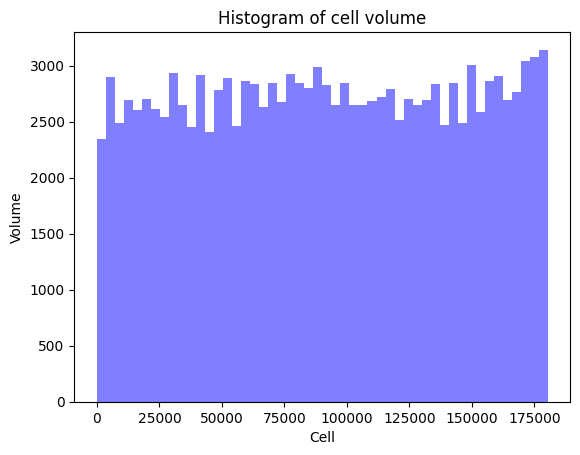

In [13]:
# Plot the histogram
plt.hist(cell_vol_data, bins=50, alpha=0.5, color='blue')

# Add labels and title
plt.xlabel('Cell')
plt.ylabel('Volume')
plt.title('Histogram of cell volume')

plt.savefig('histogram.png')
# Show the plot
plt.show()

In [21]:
!pip -q install xlsxwriter 

with pd.ExcelWriter('metadata_vol_3.xlsx', engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name='filtered volume')
    worksheet = writer.sheets['filtered volume']
    worksheet.insert_image('E2', 'histogram.png')